In [2]:
# 1. magic to print version
# 2. magic so that the notebook will reload external python modules
# https://gist.github.com/minrk/3301035
%load_ext watermark
%load_ext autoreload
%autoreload 
from typing import List
%watermark -a 'Jae H. Choi' -d -t -v -p typing

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Jae H. Choi 2020-12-21 15:33:32 

CPython 3.8.3
IPython 7.16.1

typing unknown


## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`. Run the cell below to visualize a single estimator from a random forest model, using the Iris dataset to classify the data into the appropriate species.

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
Accuracy: 0.9111111111111111


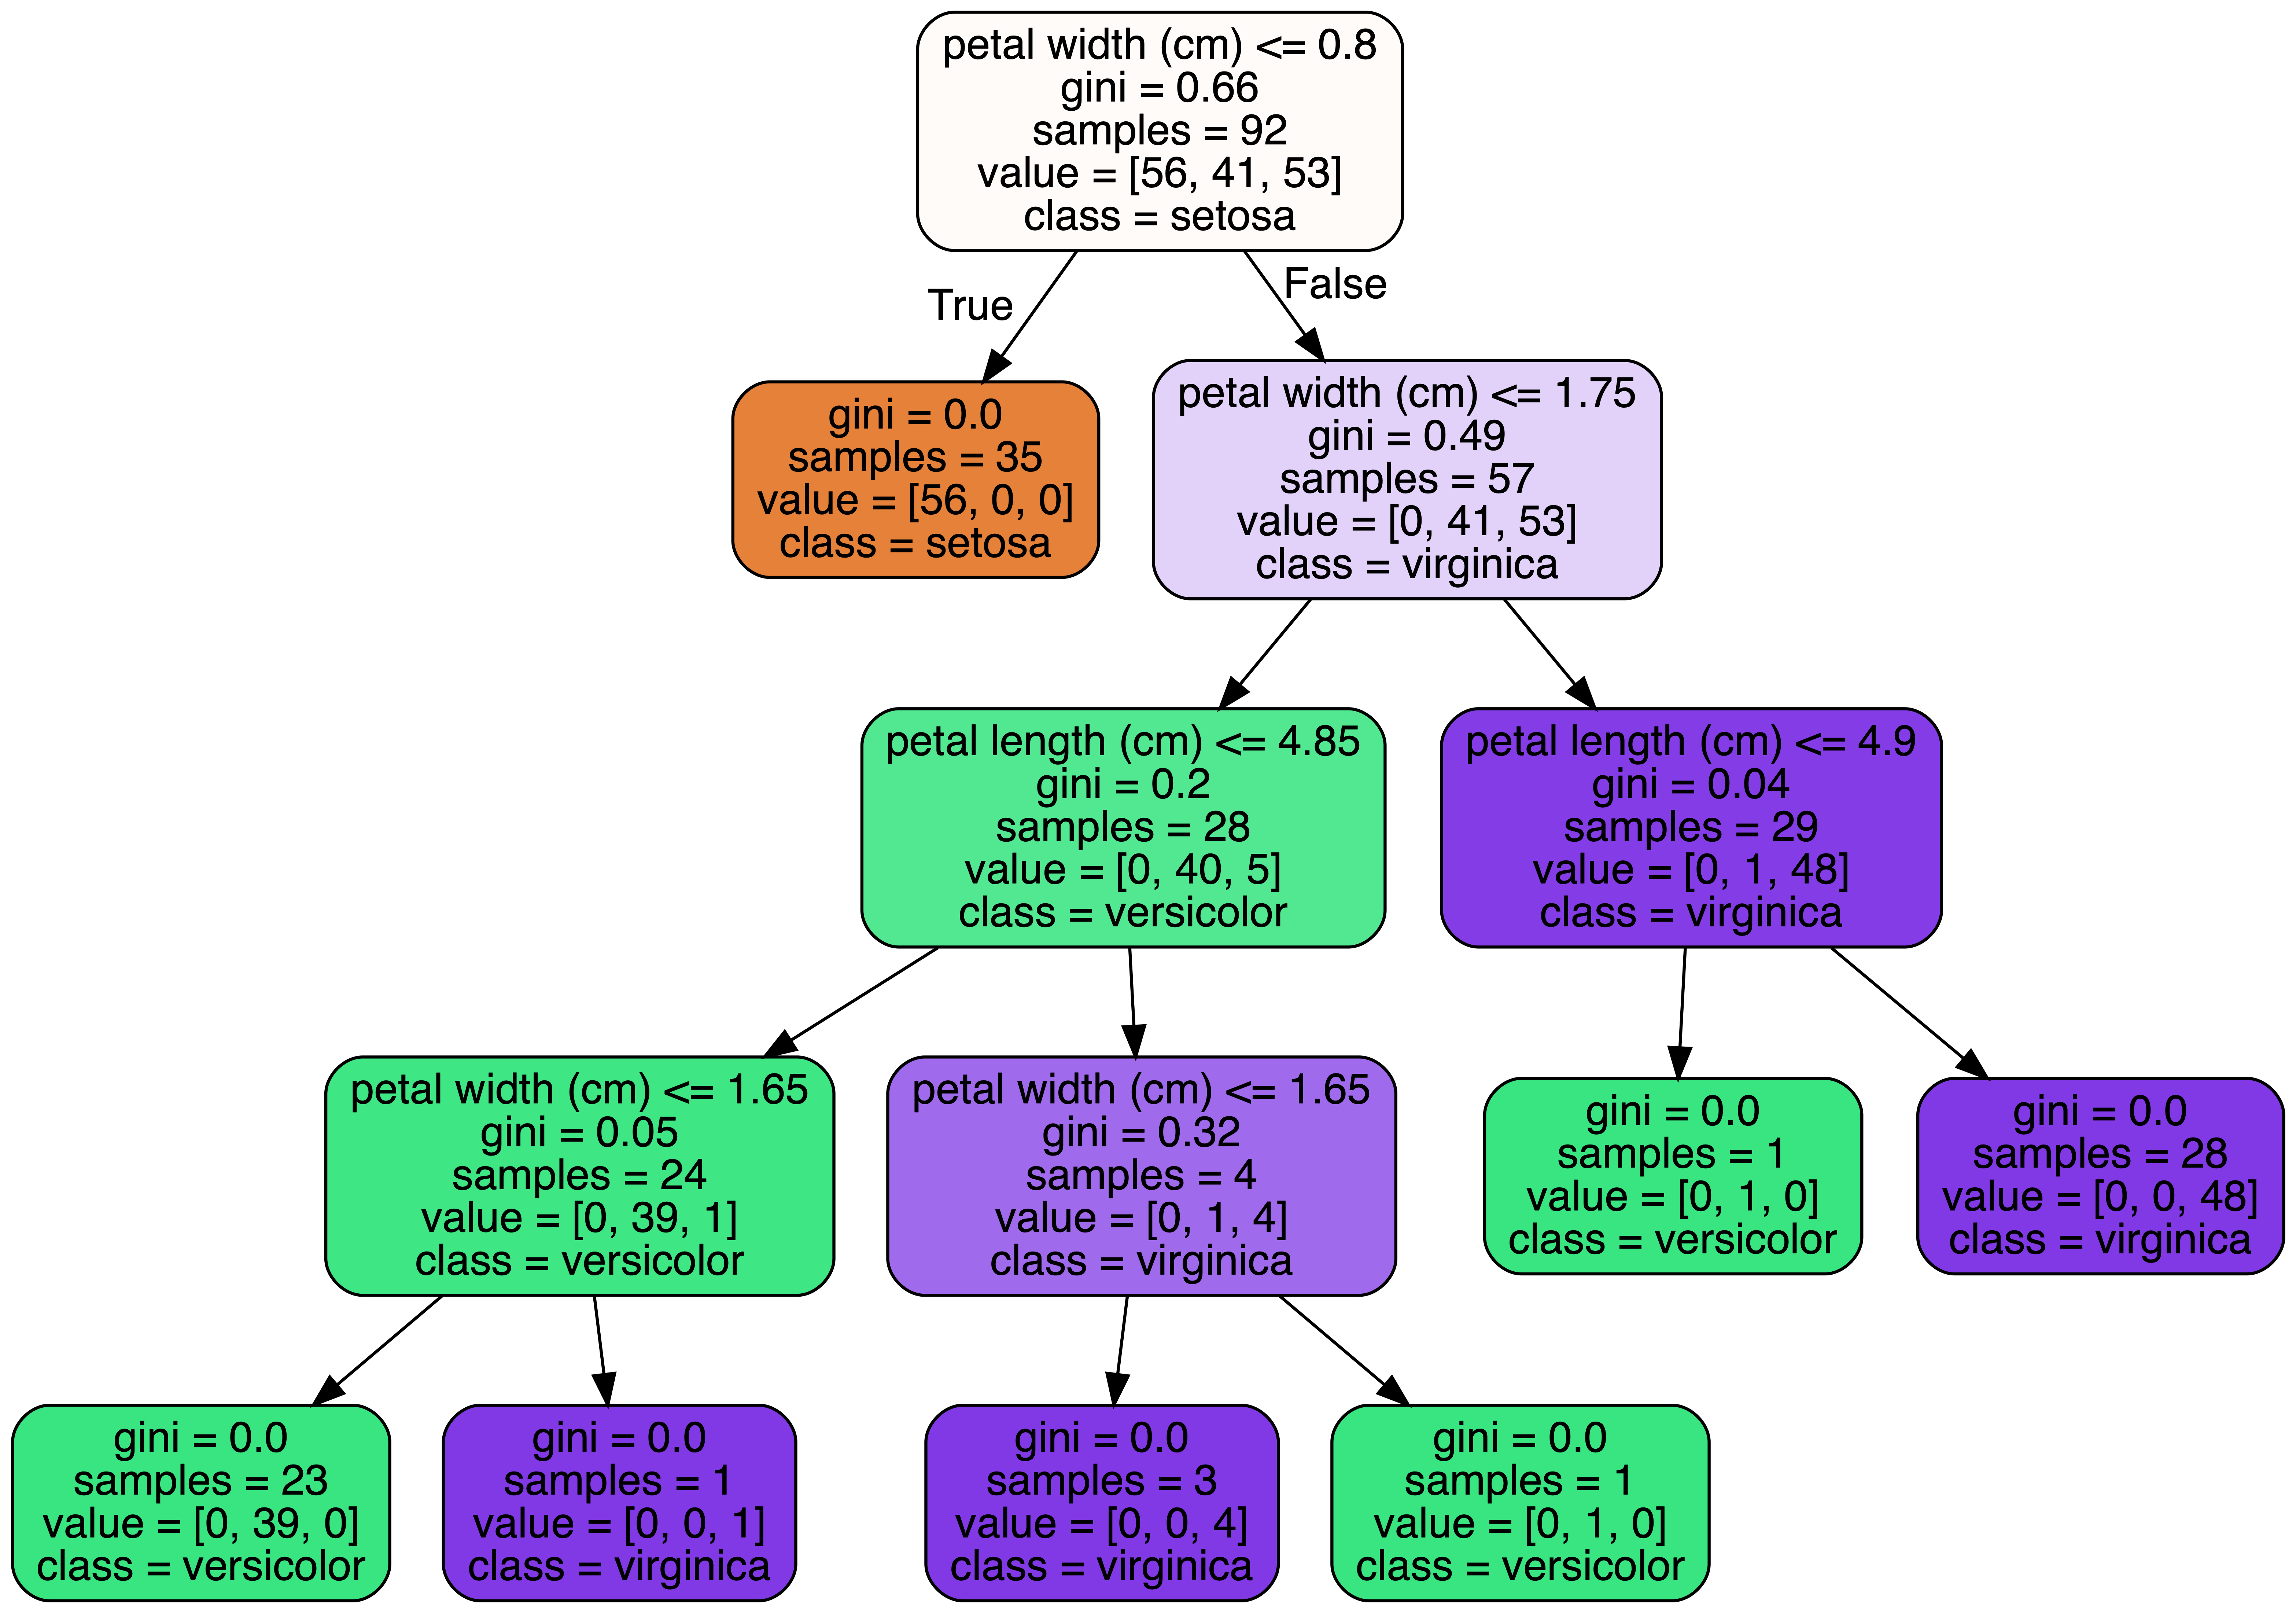

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)
# print the names of the four features
print(iris.feature_names)

import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
print(data.head(3))

# Split the dataset into training 70% - testing 30%
from sklearn.model_selection import train_test_split
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] # Features
y=data['species'] # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
iris_model = RandomForestClassifier(n_estimators=10)
iris_model.fit(X_train, y_train)
y_pred=iris_model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train
iris_model.fit(iris.data, iris.target)


# Extract single tree
estimator = iris_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='iris_tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'iris_tree.png')

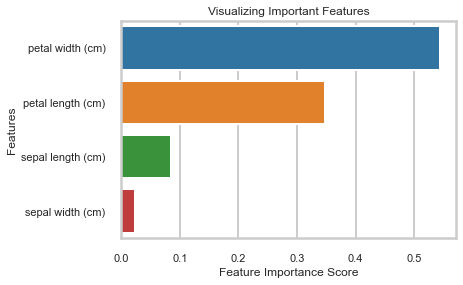

In [2]:

feature_imp = pd.Series(iris_model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster", font_scale=.5)
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# plt.legend()
plt.show()

Notice how each split seperates the data into buckets of similar observations. This is a single tree and a relatively simple classification dataset, but the same method is used in a more complex dataset with greater depth to the trees.

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project was continuing to spread throughout the world. Many governments recommended only essential outings to public places and closed most business that do not serve food or sell essential items. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

This case study was designed to drive home the important role that data science plays in real-world situations like this pandemic. This case study uses the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on this important topic. The goal of the case study is to build a Random Forest Classifier to predict the 'state' of the patient.

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [3]:
# pip install plotly


In [4]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
# import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [5]:
url ='SouthKoreacoronavirusdataset/PatientInfo.csv'
df = pd.read_csv(url)
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [7]:
df.shape

(2218, 18)

In [8]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [9]:
#counts of response variable values
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

 **<font color='teal'> Create a new column named 'n_age' which is the calculated age based on the birth year column.</font>**

In [10]:
df.age.unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '100s'], dtype=object)

In [11]:
print(f"Total instances: {len(df)}")

# df.loc[np.df.age == True, 'disease'] = 1 
# for i in range(2000):
#     if type(df.age[i])==float:
#         print(i,':', df.age[i], type(df.age[i]))
# #(df.age[650:700])
 

Total instances: 2218


In [12]:
df['n_age']=pd.Series(np.ones((len(df),), dtype=float)*2020)-df.birth_year
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'n_age'],
      dtype='object')

In [13]:
# check
pd.concat([df.birth_year, df.n_age], axis=1).head()


,birth_year,n_age
0,1964.0,56.0
1,1987.0,33.0
2,1964.0,56.0
3,1991.0,29.0
4,1992.0,28.0


In [14]:
df.n_age.unique()

array([ 56.,  33.,  29.,  28.,  54.,  25.,  37.,  60.,  58.,  82.,  68.,
        77.,  75.,  76.,  20.,  79.,  84.,  35.,  59.,  40.,  62.,  34.,
        52.,  70.,  66.,  55.,  50.,  36.,  57.,  44.,  67.,  43.,  41.,
        21.,  27.,  64.,  26.,  47.,  83.,  74.,  30.,  85.,  65.,  46.,
        45.,  53.,  38.,  17.,  24.,  32.,  69.,  23.,  15.,  51.,  48.,
        49.,  91.,   7.,  39.,   0.,  31.,  42.,  22.,  61.,  71.,  13.,
        16.,  19.,   8.,  81.,  14.,  18.,  73.,   5.,  88.,  72.,  63.,
        86.,  90.,  87.,  nan,  11.,   2.,  78.,  12.,   9.,  10.,   6.,
         3.,   1.,  80.,  94.,  95.,  92.,  93., 104.,  89.])

In [15]:
df.n_age.fillna(int(df.n_age.mean()), inplace=True)
df.n_age.isnull().values.any()

False

### Handle Missing Values

 **<font color='teal'> Print the number of missing values by column.</font>**

In [16]:
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

 **<font color='teal'> Fill the 'disease' missing values with 0 and remap the True values to 1.</font>**

In [18]:
# check unique values in df['disease']
df.disease.unique()

array([nan, True], dtype=object)

In [113]:
# replace np.nan with 0 and Ture with 1
df.disease.replace(np.nan, 0, inplace=True)
df.disease.replace(True, 1, inplace=True)
# check 
df.disease.unique()

array([0, 1])

In [116]:
df['disease'].value_counts()


0    2199
1      19
Name: disease, dtype: int64

 **<font color='teal'> Fill null values in the following columns with their mean: 'global_number','birth_year','infection_order','infected_by'and 'contact_number'</font>**

In [20]:
# check the names of column
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'n_age'],
      dtype='object')

In [21]:
# check if global_num has pd.Nan
df.global_num.isnull().values.any()


True

In [22]:
# fill np.Nan with mean of each column
df.global_num.fillna(df.global_num.mean(), inplace=True)
df.birth_year.fillna(df.birth_year.mean(), inplace=True)
df.infection_order.fillna(df.infection_order.mean(), inplace=True)
df.infected_by.fillna(df.infected_by.mean(), inplace=True)
df.contact_number.fillna(df.contact_number.mean(), inplace=True)

In [23]:
# check if the following columns have pd.Nan
print(df.global_num.isnull().values.any()) #[980:1000]
print(df.birth_year.isnull().values.any())
print(df.infection_order.isnull().values.any()) 
print(df.infected_by.isnull().values.any())
print(df.contact_number.isnull().values.any())

False
False
False
False
False


 **<font color='teal'> Fill the rest of the missing values with any method.</font>**

In [24]:
# check the missing values
df.info() 
# sex, age, city, infection_case, symptom_onset_date, confirmed_date, released_date, deceased_date, state, n_age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             2218 non-null   int64  
 9   infection_case      1163 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [25]:
df.n_age.unique()

array([ 56.,  33.,  29.,  28.,  54.,  25.,  37.,  60.,  58.,  82.,  68.,
        77.,  75.,  76.,  20.,  79.,  84.,  35.,  59.,  40.,  62.,  34.,
        52.,  70.,  66.,  55.,  50.,  36.,  57.,  44.,  67.,  43.,  41.,
        21.,  27.,  64.,  26.,  47.,  83.,  74.,  30.,  85.,  65.,  46.,
        45.,  53.,  38.,  17.,  24.,  32.,  69.,  23.,  15.,  51.,  48.,
        49.,  91.,   7.,  39.,   0.,  31.,  42.,  22.,  61.,  71.,  13.,
        16.,  19.,   8.,  81.,  14.,  18.,  73.,   5.,  88.,  72.,  63.,
        86.,  90.,  87.,  11.,   2.,  78.,  12.,   9.,  10.,   6.,   3.,
         1.,  80.,  94.,  95.,  92.,  93., 104.,  89.])

 **<font color='teal'> Check for any remaining null values.</font>**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             2218 non-null   int64  
 9   infection_case      1163 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [27]:
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.600789e+09,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.600789e+09,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56.0


Remove date columns from the data.


In [28]:
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.600789e+09,75.0,released,56.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.600789e+09,31.0,released,33.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,released,56.0


Review the count of unique values by column.

In [29]:
print(df.nunique())

patient_id         2218
global_num         1304
sex                   2
birth_year           97
age                  11
country               4
province             17
city                134
disease               2
infection_case       16
infection_order       7
infected_by         207
contact_number       73
state                 3
n_age                96
dtype: int64


Review the percent of unique values by column.

In [30]:
print(df.nunique()/df.shape[0])

patient_id         1.000000
global_num         0.587917
sex                0.000902
birth_year         0.043733
age                0.004959
country            0.001803
province           0.007665
city               0.060415
disease            0.000902
infection_case     0.007214
infection_order    0.003156
infected_by        0.093327
contact_number     0.032913
state              0.001353
n_age              0.043282
dtype: float64


Review the range of values per column.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2218.0,4.014678e+09,2.192419e+09,1.000000e+09,1.700000e+09,6.001000e+09,6.004000e+09,7.000000e+09
global_num,2218.0,4.664817e+03,2.211785e+03,1.000000e+00,4.205250e+03,4.664817e+03,5.900250e+03,8.717000e+03
birth_year,2218.0,1.974989e+03,1.731123e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.988000e+03,2.020000e+03
disease,2218.0,8.566276e-03,9.217769e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
infection_order,2218.0,2.285714e+00,1.706622e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,2218.0,2.600789e+09,7.216328e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,2218.0,2.412895e+01,3.917141e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age,2218.0,4.500902e+01,1.731123e+01,0.000000e+00,3.200000e+01,4.500000e+01,5.500000e+01,1.040000e+02


### Check for duplicated rows

In [34]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age


Print the categorical columns and their associated levels.

In [35]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,sex,2
1,age,11
2,country,4
3,province,17
4,city,134
5,infection_case,16
6,state,3


**<font color='teal'> Plot the correlation heat map for the features.</font>**

In [38]:
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.600789e+09,75.0,released,56.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.600789e+09,31.0,released,33.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,released,56.0


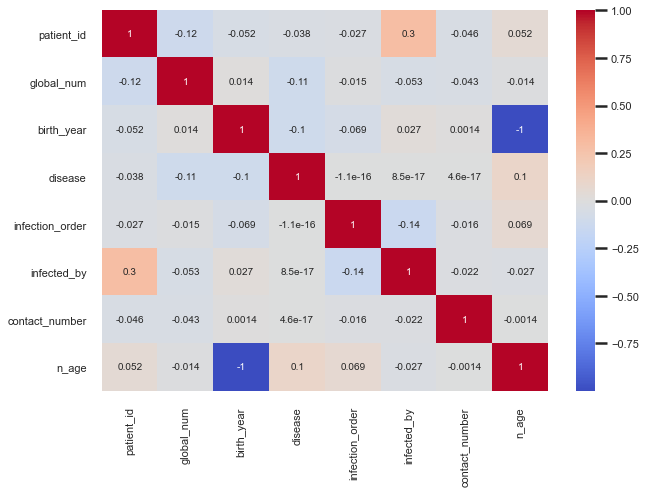

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

# the warmer, the positively correlated; the colder, the negatively correlated.
plt.show()

In [42]:
# feature selections: sex, country, disease, infection_order, contact_number, n_age
df_features= df[['sex', 'country', 'disease', 'infection_order', 'contact_number', 'n_age']]
df_features.head(3)

,sex,country,disease,infection_order,contact_number,n_age
0,male,Korea,0,1.0,75.0,56.0
1,male,Korea,0,1.0,31.0,33.0
2,male,Korea,0,2.0,17.0,56.0


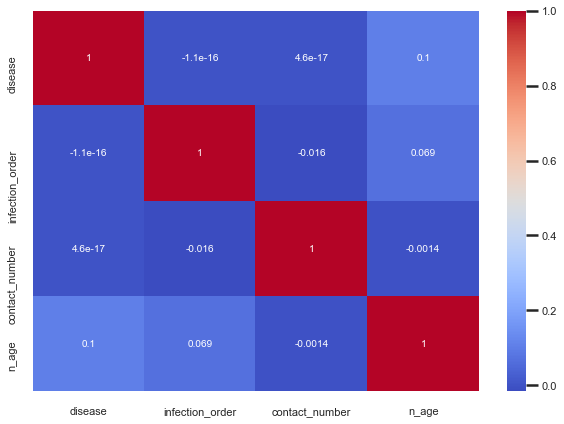

In [43]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
sns.heatmap(df_features.corr(), annot=True, cmap="coolwarm") 

# the warmer, the more correlated; the colder, the less correlated.
plt.show()

**<font color='teal'> Plot the boxplots to check for outliers. </font>**

In [90]:
df[['infected_by']].head(7)

,infected_by
0,2.600789e+09
1,2.600789e+09
2,2.002000e+09
3,2.600789e+09
4,1.000000e+09
5,1.000000e+09
6,1.000000e+09


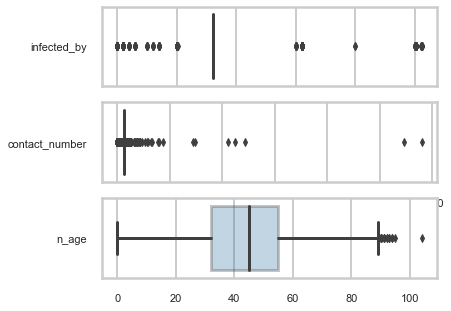

In [100]:
fig, axes = plt.subplots(3,1, figsize=(6, 5))
sns.boxplot(data=df[['infected_by']], orient='h', 
            boxprops=dict(alpha=.3), ax=axes[0])
sns.boxplot(data=df[['contact_number']],  orient='h', 
            boxprops=dict(alpha=.3), ax=axes[1])
sns.boxplot(data=df[['n_age']], orient='h', 
            boxprops=dict(alpha=.3), ax=axes[2])

plt.show()

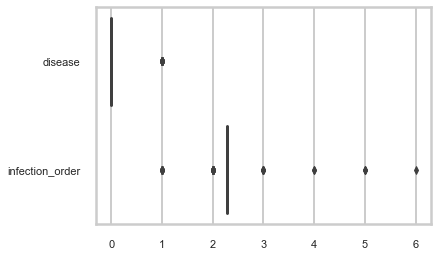

In [93]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))
sns.boxplot(data=df[['disease', 'infection_order']], orient='h')
plt.show()

**<font color='teal'> Create dummy features for object type features. </font>**

In [111]:
categ2numer=pd.get_dummies(df[['sex', 'country', 'disease', 'infection_order', 'contact_number', 'n_age']])
categ2numer.head(3)


,disease,infection_order,contact_number,n_age,sex_female,sex_male,country_China,country_Korea,country_Mongolia,country_Thailand
0,0,1.0,75.0,56.0,0,1,0,1,0,0
1,0,1.0,31.0,33.0,0,1,0,1,0,0
2,0,2.0,17.0,56.0,0,1,0,1,0,0


In [140]:
df['contact_number'][20:40]

20    24.128954
21    24.128954
22    24.128954
23    24.128954
24    24.128954
25    24.128954
26    24.128954
27    24.128954
28    24.128954
29    24.128954
30    24.128954
31    24.128954
32    24.128954
33    24.128954
34    24.128954
35    24.128954
36    24.128954
37    24.128954
38    24.128954
39    24.128954
Name: contact_number, dtype: float64

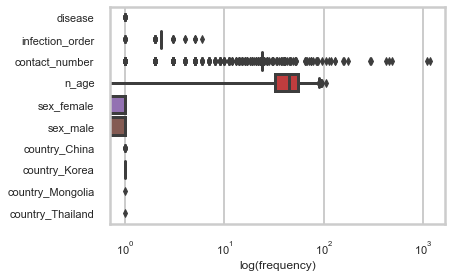

In [147]:
fig, axes = plt.subplots(1,1, figsize=(6, 4))
categ2numer_box=sns.boxplot(data=categ2numer, orient='h')
categ2numer_box.set_xscale("log")
categ2numer_box.set(xlabel='log(frequency)')
plt.show()

### Split the data into test and train subsamples

In [148]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

### Scale data to prep for model creation

In [149]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [150]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

### Fit Random Forest Classifier
The fit model shows an overall accuracy of 80% which is great and indicates our model was effectively able to identify the status of a patients in the South Korea dataset.

In [151]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.967
Random Forest: f1-score=0.967


### Create Confusion Matrix Plots
Confusion matrices are great ways to review your model performance for a multi-class classification problem. Being able to identify which class the misclassified observations end up in is a great way to determine if you need to build additional features to improve your overall model. In the example below we plot a regular counts confusion matrix as well as a weighted percent confusion matrix. The percent confusion matrix is particulary helpful when you have unbalanced class sizes.

In [152]:
class_names=['isolated','released','missing','deceased'] # name  of classes

Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.   1.  ]]


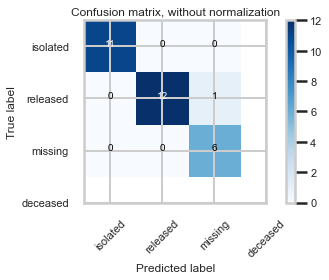

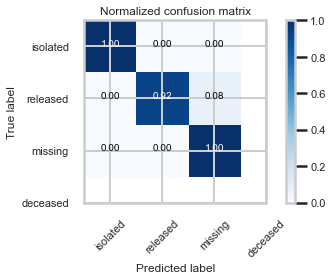

In [153]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

### Plot feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

4


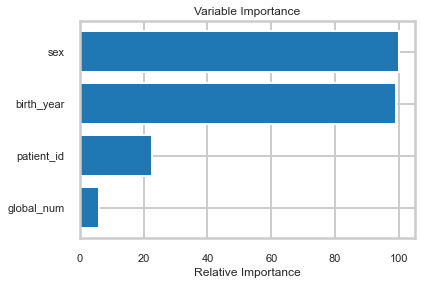

In [158]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(6,4))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model would not. In this case study we demonstrate the performance ability even with only a few features and almost all of them being highly correlated with each other.
Random Forest is also used as an efficient way to investigate the importance of a set of features with a large data set. Consider random forest to be one of your first choices when building a decision tree, especially for multiclass classifications.